<a href="https://colab.research.google.com/github/LeonimerMelo/Machine_Learning/blob/KNN/k_Nearest_Neighbor_classifier_(KNN)_%5Biris_dataset%5D_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN as Classifier

O que é o KNN?

KNN (K — Nearest Neighbors) é um dos muitos algoritmos (de aprendizagem supervisionada) usado no campo de data mining e machine learning, ele é um classificador onde o aprendizado é baseado “no quão similar” é um dado (um vetor) do outro. O treinamento é formado por vetores de n dimensões.

O KNN (K-nearest neighbors, ou “K-vizinhos mais próximos”) costuma ser um dos primeiros algoritmos aprendidos por iniciantes no mundo do aprendizado de máquina.

O KNN é muito utilizado em problemas de classificação, e felizmente é um dos algoritmos de machine learning mais fáceis de se compreender. Em resumo, o KNN tenta classificar cada amostra de um conjunto de dados avaliando sua distância em relação aos vizinhos mais próximos. Se os vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria. Para entender como o KNN funciona detalhadamente, primeiro considere que temos um conjunto de dados dividido em duas classes: azul e vermelho, conforme a figura abaixo.


<center><img src='https://didatica.tech/wp-content/uploads/2019/09/duas-classes.jpg' width=300></center>

Agora recebemos uma amostra que ainda não está classificada, e gostaríamos de definir se ela pertence à classe azul ou à classe vermelha. Digamos que essa nova amostra (cor verde na figura abaixo) esteja localizada nessa região:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/nova-amostra-para-classificar.jpg' width=300></center>

Intuitivamente, podemos observar que faz mais sentido classificar essa amostra como pertencendo à classe vermelha. Mas o algoritmo não possui “intuição”, ele precisa de um cálculo matemático para poder definir a solução.

No caso do KNN, a lógica é a seguinte: Observa-se a classe dos vizinhos mais próximos, em uma votação onde a maioria vence. Por exemplo, vamos supor que estamos analisando os 3 vizinhos mais próximos. Obs: **mais próximo significa com a menor distância em relação à amostra**:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/classificando-a-amostra.png' width=300></center>

Na figura acima, podemos ver que os 3 vizinhos mais próximos pertencem à classe vermelha. Então como houve 3 votos a zero para a classe vermelha, essa amostra fica sendo classificada nessa classe:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/classificacao-escolhida.jpg' width=300></center>

Obs: talvez agora esteja mais claro o significado do nome “KNN”, que refere-se a “k-vizinhos mais próximos”, onde k é um número que podemos determinar. Nesse exemplo, estamos usando k=3. Agora recebemos outra amostra que queremos classificar:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/proxima-amostra.jpg' width=300></center>

Utilizando o mesmo método KNN com k=3:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/k3.jpg' width=300></center>

Encontramos os 3 vizinhos mais próximos dessa amostra. Dessa vez, há duas amostras da classe vermelha e uma da classe azul. Como a votação ficou 2×1 para a classe vermelha, essa amostra ficaria sendo classificada nessa classe:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/classe-final-com-k3.jpg' width=300></center>

Essa metodologia poderia ser aplicada para qualquer nova amostra e estaríamos aptos a definir sua devida classificação. Porém até agora utilizamos apenas o exemplo de k=3. Na prática, podemos escolher outro valor de k. Vamos supor que a mesma amostra anterior estivesse sendo analisada com o algoritmo de KNN com k=5:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/knn-com-k5-300x292.jpg' width=300></center>

Dessa vez, dos 5 vizinhos mais próximos, 3 são azuis e 2 são vermelhos. Portanto a classe vencedora foi a azul. Essa amostra seria classificada nessa classe:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/classe-final-com-k5-300x292.jpg' width=300></center>

Nota-se que, dependendo do valor de k, poderemos ter resultados diferentes para cada situação.

Quando o k é pequeno, a classificação fica mais sensível a regiões bem próximas (podendo ocorrer o problema de *overfitting*). Com k grande, a classificação fica menos sujeita a ruídos pode ser considerada mais robusta, porém se k for grande demais, pode ser que haja o problema de *underfitting*.

Obs: nos exemplos acima tentamos mostrar visualmente quais eram os vizinhos mais próximos em cada situação. Porém não podemos esquecer que a forma como o algoritmo faz essa seleção é *calculando a distância de cada um dos pontos já classificados em relação à nova amostra que queremos classificar*. Ou seja, como nos exemplos havia cerca de 30 amostras já classificadas, o algoritmo KNN teria que fazer o cálculo da distância de cada um desses pontos em relação à nova amostra, e ordenar depois do menor ao maior, selecionando assim as amostras mais próximas.

##Resumo do processo realizado pelo algoritmo KNN:
1 ) Receba um dado não classificado e meça distância do novo dado em relação a cada um dos outros dados que já estão classificados;

2 ) Selecione as K menores distâncias;

3 ) Verifique a(s) classe(s) dos dados que tiveram as K menores distâncias e contabilize a quantidade de vezes que cada classe que apareceu;

4 )  Classifique esse novo dado como pertencente à classe que mais apareceu.

In [ ]:
# First, start with importing necessary python packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [ ]:
# Next, download the iris dataset as follows
iris = datasets.load_iris()
#print(iris.data[0])
X = iris.data
y = iris.target

In machine learning, **data** is usually denoted with a capital  **X**, while **labels** are denoted by a lowercase  **y**. This is inspired by the standard formulation  `f(x)=y`  in mathematics, where  *x* is the input to a function and  *y* is the output. Following more conventions from mathematics, we use a capital  *X* because the data is a two-dimensional array (a matrix) and a lowercase y because the target is a one-dimensional array (a vector).

In [ ]:
print("Keys of iris dataset: \n{}".format(iris.keys()))

Keys of iris dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Now, we need to read dataset to pandas dataframe

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X[:, 1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

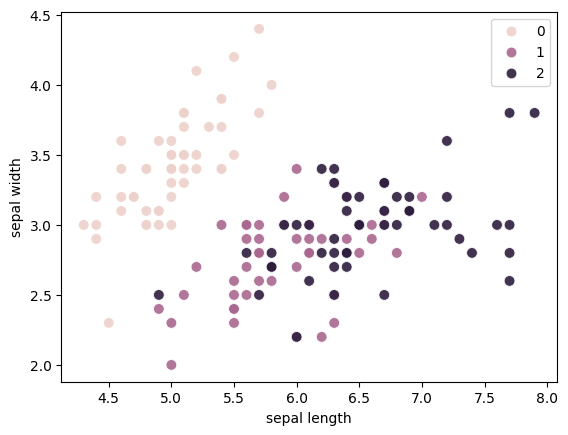

In [ ]:
# sepal length X sepal width plotting (two columm dataset plotting)
import seaborn as sns
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=60, alpha=.9)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

In [ ]:
iris_target = dict(enumerate(iris['target_names']))
iris_target

{0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')}

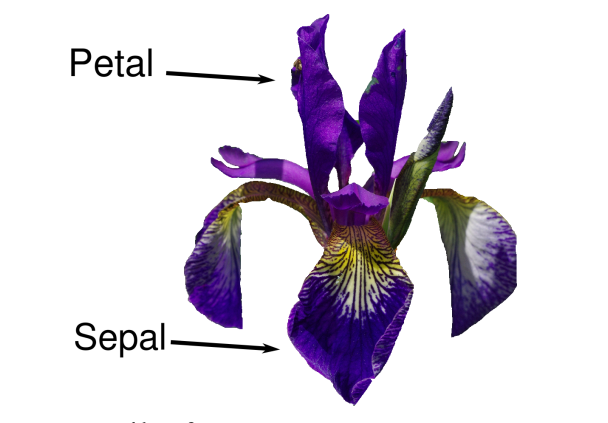

Because we have measurements for which we know the correct species of iris, this is a
supervised learning problem. In this problem, we want to predict one of several
options (the species of iris). This is an example of a classification problem. The possible outputs (different species of irises) are called classes. Every iris in the dataset
belongs to one of three classes, so this problem is a three-class classification problem.

The desired output for a single data point (an iris) is the species of this flower. For a
particular data point, the species it belongs to is called its label.

Next some detales of dataframe

In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# First Things First: Look at Your Data
Before building a machine learning model it is often a good idea to inspect the data,
to see if the task is easily solvable without machine learning, or if the desired information might not be contained in the data.

Additionally, inspecting your data is a good way to find abnormalities and peculiarities. Maybe some of your irises were measured using inches and not centimeters, for
example. In the real world, inconsistencies in the data and unexpected measurements
are very common.

One of the best ways to inspect data is to visualize it. One way to do this is by using a
scatter plot. A scatter plot of the data puts one feature along the x-axis and another
along the y-axis, and draws a dot for each data point. Unfortunately, computer
screens have only two dimensions, which allows us to plot only two (or maybe three)
features at a time. It is difficult to plot datasets with more than three features this way.
One way around this problem is to do a pair plot, which looks at all possible pairs of
features. If you have a small number of features, such as the four we have here, this is
quite reasonable. You should keep in mind, however, that a pair plot does not show
the interaction of all of features at once, so some interesting aspects of the data may
not be revealed when visualizing it this way.

Figure depicts a pair plot of the features in the data set. The data points are colored
according to the species the iris belongs to. To create the plot, we first convert the
NumPy array into a  pandas  DataFrame.  pandashas a function to create pair plots
called  scatter_matrix. The diagonal of this matrix is filled with histograms of each
feature.

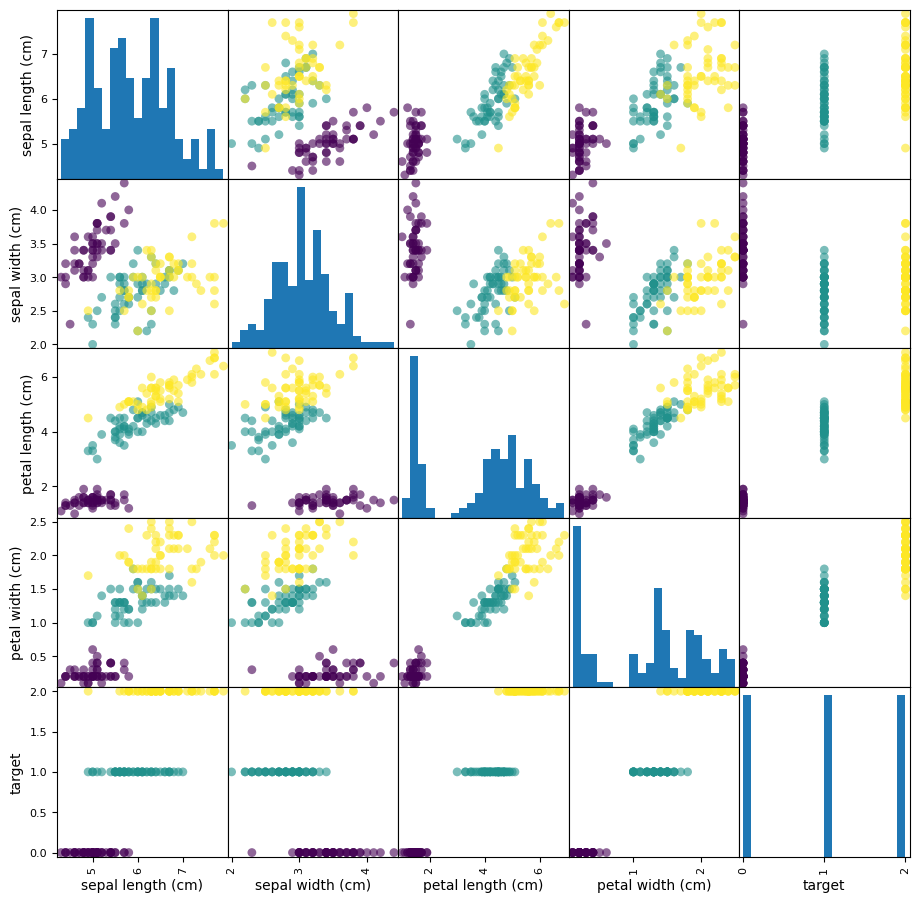

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, c=y, alpha=0.6, figsize=(11, 11), marker='o', hist_kwds={'bins': 20}, s=40)
plt.show()

Next, we will divide the data into train and test split. Following code will split the dataset into 70% training data and 30% of testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Before making the split, the  train_test_split function shuffles the dataset using a pseudo random number generator. If we just took the last 30% of the data as a test set, all the data points would have the label  2, as the data points are sorted by the label (see the output for  `iris['target']` shown earlier). Using a test set containing only one of the three classes would not tell us much about how well our model generalizes,
so we shuffle our data to make sure the test data contains data from all classes.

To make sure that we will get the same output if we run the same function several times, we provide the pseudorandom number generator with a fixed seed using the random_state parameter. This will make the outcome deterministic, so this line will always have the same outcome. We will always fix the `random_state` in this way when using randomized procedures.

The output of the  train_test_splitfunction is  *X_train*,  *X_test*,  *y_train*, and *y_test*, which are all NumPy arrays. X_train contains 70% of the rows of the dataset, and *X_test* contains the remaining 30%.

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (105, 4)
y_train shape: (105,)
X_test shape: (45, 4)
y_test shape: (45,)


Next, data scaling will be done as follows

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Before standardization:

In [ ]:
X_train[0:10]

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8]])

In [ ]:
X_train_std[0:10]

array([[-1.02366372, -2.37846268, -0.18295039, -0.29318114],
       [ 0.69517462, -0.10190314,  0.93066067,  0.7372463 ],
       [ 0.92435306,  0.58106472,  1.04202177,  1.63887031],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35083601],
       [ 0.92435306, -1.24018291,  1.09770233,  0.7372463 ],
       [-0.33612839, -1.24018291,  0.03977182, -0.16437771],
       [ 2.07024529, -0.10190314,  1.26474398,  1.38126345],
       [ 0.46599617,  0.58106472,  0.48521625,  0.47963944],
       [-0.45071761, -1.46783886, -0.01590873, -0.16437771],
       [ 0.46599617, -0.784871  ,  0.59657735,  0.7372463 ]])

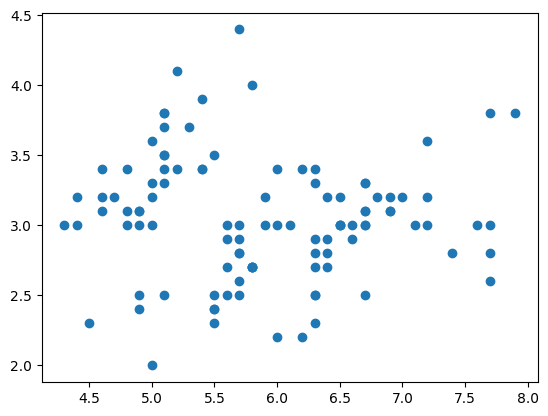

In [ ]:
# plot frist columm of dataset
plt.plot(X_train[:,0], X_train[:,1], 'o')
plt.show()

After standardization:

In [ ]:
X_train_std[0:10]

array([[-1.02366372, -2.37846268, -0.18295039, -0.29318114],
       [ 0.69517462, -0.10190314,  0.93066067,  0.7372463 ],
       [ 0.92435306,  0.58106472,  1.04202177,  1.63887031],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35083601],
       [ 0.92435306, -1.24018291,  1.09770233,  0.7372463 ],
       [-0.33612839, -1.24018291,  0.03977182, -0.16437771],
       [ 2.07024529, -0.10190314,  1.26474398,  1.38126345],
       [ 0.46599617,  0.58106472,  0.48521625,  0.47963944],
       [-0.45071761, -1.46783886, -0.01590873, -0.16437771],
       [ 0.46599617, -0.784871  ,  0.59657735,  0.7372463 ]])

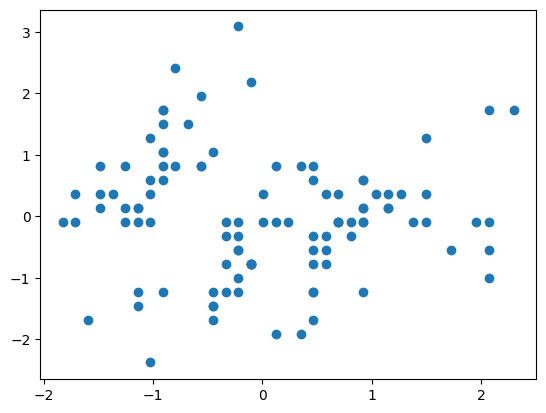

In [ ]:
plt.plot(X_train_std[:,0], X_train_std[:,1], 'o')
plt.show()

Next, train the model with the help of KNeighborsClassifier class of sklearn

# Building Your First Model: k-Nearest Neighbors
Now we can start building the actual machine learning model. There are many classification algorithms in  `scikit-learn` that we could use. Here we will use a  k-nearest
neighbors classifier, which is easy to understand. Building this model only consists of
storing the training set. To make a prediction for a new data point, the algorithm
finds the point in the training set that is closest to the new point. Then it assigns the
label of this training point to the new data point.

The *k* in  *k-nearest neighbors* signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number  kof neighbors in the training (for example, the closest three or five neighbors). Then, we can make a prediction using the majority class among these neighbors.

All machine learning models in `scikit-learn` are implemented in their own classes, which are called  Estimatorclasses. The  *k-nearest neighbors* classification algorithm is implemented in the  KNeighborsClassifier class in the neighbors  module. Before
we can use the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The most important parameter of  `KNeighborsClassifier` is the number of neighbors, which we will set to 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train);

# Evaluating the Model
This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species is for each iris in the test
set.
Therefore, we can make a prediction for each iris in the test data and compare it
against its label (the known species). We can measure how well the model works by
computing the  *accuracy*, which is the fraction of flowers for which the right species
was predicted.

In [ ]:
y_pred = knn.predict(X_test_std)
print("Test set predictions:\n{}".format(y_pred))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


Next, print the results and the metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Last one the accuracy of predictions

In [ ]:
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Accuracy: 0.9777777777777777


Another way to compute accuracy:

In [ ]:
print("Test set score: {:.3f}".format(np.mean(y_pred == y_test)))

Test set score: 0.978


In [ ]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True])

For this model, the test set accuracy is about 0.97, which means we made the right
prediction for 97% of the irises in the test set. Under some mathematical assump‐
tions, this means that we can expect our model to be correct 97% of the time for new
irises. For our hobby botanist application, this high level of accuracy means that our
model may be trustworthy enough to use.

# Making Predictions
We can now make predictions using this model on new data for which we might not
know the correct labels. Imagine we found an iris in the wild with a sepal length of
6 cm, a sepal width of 3 cm, a petal length of 5 cm, and a petal width of 2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):

In [ ]:
X_new = np.array([[3.5, 5, 5, 2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [ ]:
X_new_std = sc.transform(X_new)
X_new_std

array([[-2.74250206,  4.45121593,  0.6522579 ,  0.99485316]])

In [ ]:
# Make prediction of new sample
prediction = knn.predict(X_new_std)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


# Exercícios
1. Qual o princípio de funcionamento do algoritmo KNN?
1.   Interpretar e comentar o plot inicial do *iris dataset*
1.   Executar o algoritmo sem o pré-processamento (*StandardScaler*) normalização/padronização e comparar os resultados
1.  Plotar o iris dataset depois do pré-processamento e comparar os resultados
1.  Mudar o parâmetro `n_neighbors` (Number of neighbors to use) na função `KNeighborsClassifier` para 1, 3, 5 e 7 e comentar os resultados.
1.  O que significa a matriz de confusão? Fazer uma análise dos resultados
1.  Plotar a matriz de confusão de uma maneira mais visual, utilizando biblioteca adequada
1.  O que significam os dados no *Classification Report*
1.  O que significa a acurácia (*accuracy*)?
1. Criar uma nova entrada de dados com 3 valores próximos aos dos 3 tipos de classes e fazer a predição de cada conjunto de dados. Plotar esses dados e verificar se foram preditos corretamente.
1. Modificar a porcentagem do banco de dados para treinamento/teste nas proporções: 30% para treinamento, 50% para treinamento e 90% para treinamento. Comparar a acurácia e os dados da matriz de confusão com os resultados anteriores (70% treinamento). Criar uma tabela para visualizar essa comparação.




#Referências

[1] https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

[2] https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e

[3] https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

[4] https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

[5] https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-knn/